In [33]:
import idx2numpy
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [34]:
Adata = idx2numpy.convert_from_file("train-images-idx3-ubyte")

(60000, 28, 28)


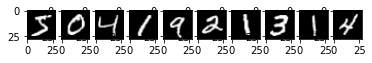

In [35]:
print(Adata.shape)
fig,axs = plt.subplots(1,10)
for i in range(10):
    axs[i].imshow(Image.fromarray(Adata[i,:,:]),cmap="gray")

In [36]:
Bdata = idx2numpy.convert_from_file("train-labels-idx1-ubyte")

In [37]:
print(Bdata.shape)
print(Bdata[0:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [40]:
A = Adata.reshape((60000,28*28))
B = np.zeros((60000,10))
for i in range(60000):
    B[i,(9+Bdata[i])%10] = 1
B[0:10,:]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [57]:
from scipy import linalg
from sklearn import linear_model as lm
from matplotlib import pyplot as plt

First, we will solve using three different algorithms, just to get some basic ideas for the mapping $X$.

In [49]:
X = lm.LinearRegression().fit(A,B)

In [52]:
X1 = lm.Lasso(alpha=1).fit(A,B)

In [56]:
X2 = lm.ElasticNet(alpha=1,l1_ratio=0.5).fit(A,B)

In [60]:
plt.hist(X.flatten())

AttributeError: 'LinearRegression' object has no attribute 'flatten'